In [57]:
#Defined class named Graph
class Graph:
  def __init__(self):
    self.nodes = {}
    self.edges = {}

  def add_node(self, name, data=None):
    if name in self.nodes and self.get_node_data(name)!='u':
        print(f"Node with name '{name}' already exists. Skipping..")
    else:
      self.nodes[name] = {'data': data}

  def add_edge(self, source, destination):
    if source not in self.nodes or destination not in self.nodes:
      raise ValueError("Source or destination node does not exist.")
    self.edges[(source, destination)] = None

  def get_node_data(self, name):
    if name not in self.nodes:
      return None
    return self.nodes[name]['data']

  def get_neighbors(self, node):
    neighbors = []
    for edge in self.edges:
      if edge[0] == node:
        neighbors.append(edge[1])
    return neighbors

  def delete_node(self, name):
    if name not in self.nodes:
      raise ValueError(f"Node '{name}' does not exist in the graph.")

    del self.nodes[name]

    edges_to_delete = []
    for edge in self.edges:
      if edge[0] == name or edge[1] == name:
        edges_to_delete.append(edge)
    for edge in edges_to_delete:
      del self.edges[edge]


  def __str__(self):
    output = "Nodes:\n"
    for name, data in self.nodes.items():
      output += f"- {name}: {data['data']}\n"
    output += "Edges:\n"
    for edge in self.edges:
      output += f"- {edge[0]} -> {edge[1]}\n"
    return output

In [58]:
#Importing important modules and libraries
import re                                     #re is used for Python Regular Expression and Pattern Matching
import matplotlib.pyplot as plt               #matplotlib.pyplot is used for visualizations and plots
import networkx as nx                         #networkx is used for creating nd manipulating networks and graphs
import numpy as np
import time
import random

In [59]:
inputs=[]
outputs=[]
graph=Graph()
#Patterns set according to aspects of benchfile lines
p1 = r"([A-Z0-9]+)"
p2 = r"\ .*\("
p3 = r"\(.*\)"
filename=""                                               #variable to hold file name during selecting bench file
Type=''                                                   #variable to hold gate type of edge later on

print("1. s27.bench")
print("2. s298.bench")
print("3. s344.bench")
op=int(input("Enter which bench file to evaulate:"))      #Bench files are uploaded into Colab Notebook Memory before runtime
if op==1:
  filename="s27.bench"
elif op==2:
  filename="s298.bench"
elif op==3:
  filename="s344.bench"
with open(filename, "r") as f:
    lines = f.readlines()                                 #lines holds each line of code from bench file including comments

for line in lines:
    if line.startswith('#') or line.startswith('\n'):     #Check for comments and newlines in benchfile and skips them
        continue
    m1 = re.search(p1, line)                              #m1 stores the 'LHS' of equation line
    m2 = re.search(p2, line)                              #m2 stores the 'operands' with brackets
    m3 = re.search(p3, line)                              #m3 stores the 'operation' taking place with succeding bracket character
    wl=0                                                  #wl stands for word left, 0-> node, 1-> input, 2-> output
    if m1:
      key=m1.group(0)                                     #key stores whether line is input, output or other line of code in benchfile
      if (key=='INPUT'):
        wl=1
      elif (key=='OUTPUT'):
        wl=2
    if m2:
      g=m2.group(0)
      Type=g[3:-1]                                        #Type stores the gate type of key node if key is not input or output
      if wl==0:
        graph.add_node(key,Type)
    if m3:
      ent=m3.group(0)[1:-1]                               #ent stores the values to be fed into key
      #if not node
      if wl==2:                                           #if key is input then ent is node stored as input type
        outputs.append(ent)
      if wl==1:                                           #if key is input then ent is node stored as input type
        inputs.append(ent)
        graph.add_node(ent,'inp')
      #if node
      else:
        if ',' in ent:                                    #if ent is two values, the we split them and store both nodes
          se=ent.split(', ')
          for i in se:
            graph.add_node(i,'u')
            graph.add_edge(key,i)
        else:                                             #if ent is single value, we directly store as node
          if wl!=2:
            graph.add_node(ent,'u')
            graph.add_edge(key,ent)

if ((((len(list(graph.nodes)))-len(inputs))%2)!=0):                     #if odd number of nodes, then we add a dummy node for future operation
  graph.add_node('D','D')
for i in inputs:
  graph.delete_node(i)
print(graph)
print('Inputs:',inputs)
print('Outputs:',outputs)

1. s27.bench
2. s298.bench
3. s344.bench
Enter which bench file to evaulate:1
Node with name 'G0' already exists. Skipping..
Node with name 'G14' already exists. Skipping..
Node with name 'G6' already exists. Skipping..
Node with name 'G8' already exists. Skipping..
Node with name 'G3' already exists. Skipping..
Node with name 'G8' already exists. Skipping..
Node with name 'G16' already exists. Skipping..
Node with name 'G15' already exists. Skipping..
Node with name 'G14' already exists. Skipping..
Node with name 'G5' already exists. Skipping..
Node with name 'G9' already exists. Skipping..
Node with name 'G1' already exists. Skipping..
Node with name 'G7' already exists. Skipping..
Node with name 'G2' already exists. Skipping..
Node with name 'G12' already exists. Skipping..
Nodes:
- G5: DFF
- G10: NOR
- G6: DFF
- G11: NOR
- G7: DFF
- G13: NOR
- G14: NOT
- G17: NOT
- G8: AND
- G15: OR
- G12: NOR
- G16: OR
- G9: NAND
- D: D
Edges:
- G5 -> G10
- G6 -> G11
- G7 -> G13
- G17 -> G11
- G8 

In [60]:
#This is section is for beautifying graph and adding color, size and weight for each node type
colors={}
sizes={}
for x,y in graph.nodes.items():
  if y['data']=='NOT':
    colors[x]='lightblue'
    sizes[x]=100
  elif y['data']=='NAND':
    colors[x]='yellow'
    sizes[x]=200
  elif y['data']=='NOR':
    colors[x]='orange'
    sizes[x]=200
  elif y['data']=='AND':
    colors[x]='pink'
    sizes[x]=150
  elif y['data']=='OR':
    colors[x]='plum'
    sizes[x]=150
  elif y['data']=='XOR':
    colors[x]='indigo'
    sizes[x]=300
  elif y['data']=='DFF':
    colors[x]='grey'
    sizes[x]=500
  else:                                             #for dummy node
    colors[x]='bisque'
    sizes[x]=100
edges_with_weights=[]
edge_weights={}
for a,b in list(graph.edges.keys()):
  weight=int((sizes[a])/100)
  edges_with_weights.append((a,b,weight))
  edge_weights[(a,b)]=weight                        #weights for each edge proportional to size of start node to visualize gate delay by node
print(edges_with_weights)

[('G5', 'G10', 5), ('G6', 'G11', 5), ('G7', 'G13', 5), ('G17', 'G11', 1), ('G8', 'G14', 1), ('G8', 'G6', 1), ('G15', 'G12', 1), ('G15', 'G8', 1), ('G16', 'G8', 1), ('G9', 'G16', 2), ('G9', 'G15', 2), ('G10', 'G14', 2), ('G10', 'G11', 2), ('G11', 'G5', 2), ('G11', 'G9', 2), ('G12', 'G7', 2), ('G13', 'G12', 2)]


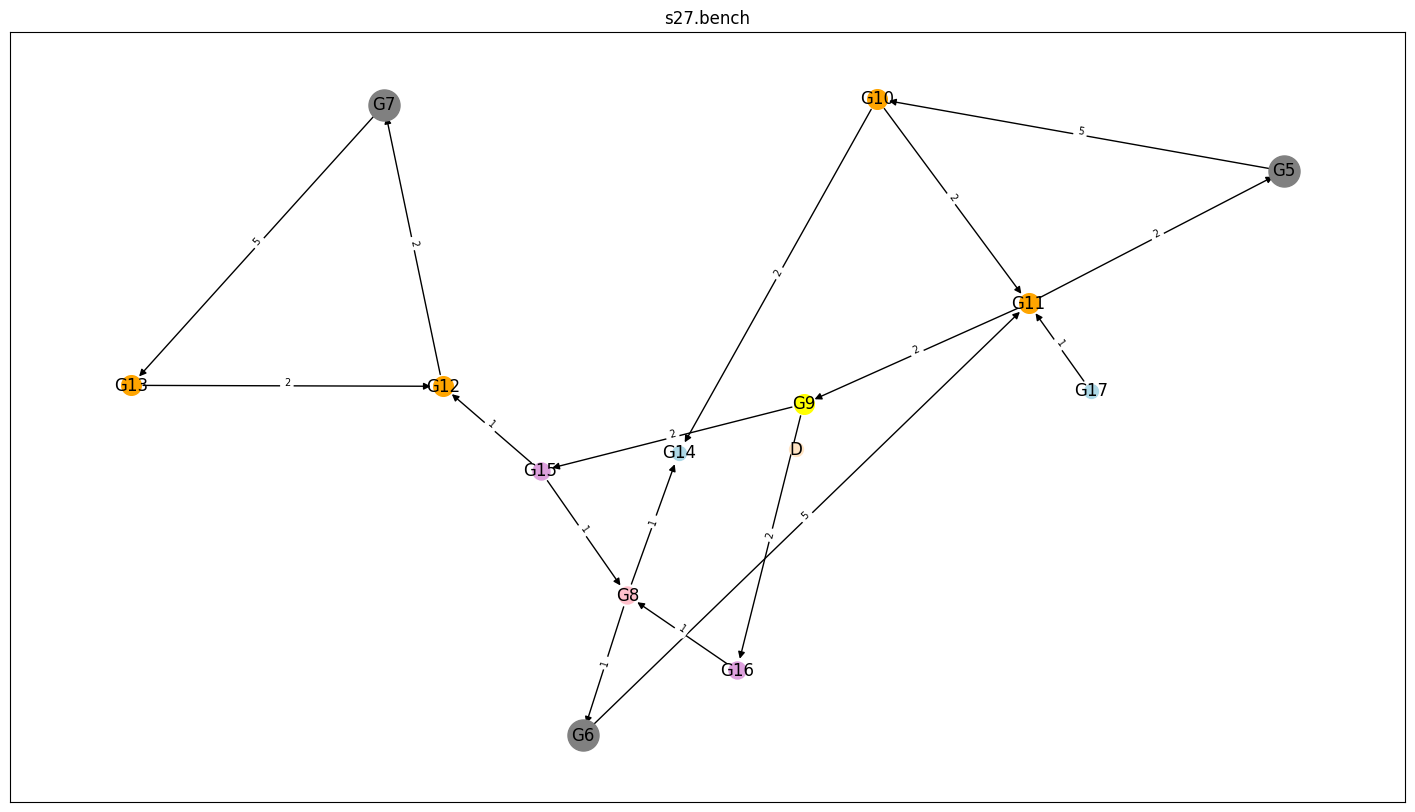

In [61]:
G = nx.DiGraph()                                                                                   #Creating a directed graph
G.add_nodes_from(list(graph.nodes))
G.add_weighted_edges_from(edges_with_weights)
plt.figure(figsize =(18, 10))
pos = nx.kamada_kawai_layout(G)                                                                     #layout to help visulaize with less clutter
node_colors = list(colors.values())
node_sizes = list(sizes.values())
for node in G.nodes:
  nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=sizes[node], node_color=colors[node])   #Incorporating nodes
  nx.draw_networkx_labels(G, pos, labels={node:node})
nx.draw_networkx_edges(G, pos, arrows=True)                                                         #Drawing edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, verticalalignment='baseline', font_size=7)
plt.title(filename)
plt.show()

In [62]:
#For Adjacency Matrix
print('The nodes are',G.nodes())
nodes=list(G.nodes())
num_nodes = G.number_of_nodes()
ind={}                                                            #The ind dictionary is for storing indices to help with translation
i=0
for node in G.nodes:
  ind[node]=i
  i+=1
print('Indices:',ind)
adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
# Loop through edges and update the matrix
for eg in edges_with_weights:
  source, target, weight = eg
  adjacency_matrix[ind[source], ind[target]] = weight
print("Adjacency Matrix:")
print(adjacency_matrix)

The nodes are ['G5', 'G10', 'G6', 'G11', 'G7', 'G13', 'G14', 'G17', 'G8', 'G15', 'G12', 'G16', 'G9', 'D']
Indices: {'G5': 0, 'G10': 1, 'G6': 2, 'G11': 3, 'G7': 4, 'G13': 5, 'G14': 6, 'G17': 7, 'G8': 8, 'G15': 9, 'G12': 10, 'G16': 11, 'G9': 12, 'D': 13}
Adjacency Matrix:
[[0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [63]:
#Finding start element
print('The outputs are:')
for o in range(len(outputs)):
  print(o+1,'-',outputs[o])
sp=int(input('Enter which output to refer:'))
if (sp-1)<len(outputs):
  fp=ind[outputs[sp-1]]
else:
  fp=ind[outputs[-1]]
print('fp=',fp)

The outputs are:
1 - G17
Enter which output to refer:1
fp= 7


In [64]:
from inspect import EndOfBlock
#Shortest Path Algorithm
from heapq import heappop, heappush
INF = 10000                                                     #Assigned an infinity for the sake of algorithm
def Djikstra(mat, start):                                       #Djikstra Algorithm Func with priority queue
  for i in range(len(mat)):                                     #Replacing 0s with INF to symbolise no edge in algorithm
    for j in range(len(mat)):
      if mat[i][j]==0:
        mat[i][j]=INF
  dist=[INF]*len(mat)
  dist[start]=0
  predecessor = {num: None for num in range(len(mat))}
  pri_q=[(0,start),]
  i=0
  while pri_q:
    current_distance, current_vertex = heappop(pri_q)
    if current_distance > dist[current_vertex]:
      continue
    for neighbour in range(len(mat[current_vertex])):
      if mat[current_vertex][neighbour] != INF:
        t=current_distance + mat[current_vertex][neighbour]
        if t < dist[neighbour]:
          dist[neighbour] = t
          predecessor[neighbour] = current_vertex
          heappush(pri_q,(t,neighbour))
  for i in range(len(mat)):
    for j in range(len(mat)):
      if mat[i][j]==INF:
        mat[i][j]=0
  return dist, predecessor
def Path(start,end):                                            #Path function to help reconstruct the shortest path for each node
  current=start
  while True:
    if current==end:
      print(nodes[end])
      break
    print(nodes[current],'-> ',end='')
    current=pred[current]
start_time=time.time()
start=fp                                                        #start value corresponding to G17 with regards to s27.bench, will change
sd,pred=Djikstra(adjacency_matrix,start)
end_time=time.time()
print('The array for shortest distances: ',sd)
print('Elapsed time:', end_time-start_time)
for i in range(len(sd)):                                        #Iterate through the sd array and Path function
  if sd[i]==INF:
    print('Vertex',nodes[i],'cannot be reached')
  else:
    print('Vertex',nodes[i],'has dist of ',sd[i],'==> ',end='')
    Path(i,start)

The array for shortest distances:  [3, 8, 7, 1, 8, 13, 7, 0, 6, 5, 6, 5, 3, 10000]
Elapsed time: 0.00042819976806640625
Vertex G5 has dist of  3 ==> G5 -> G11 -> G17
Vertex G10 has dist of  8 ==> G10 -> G5 -> G11 -> G17
Vertex G6 has dist of  7 ==> G6 -> G8 -> G15 -> G9 -> G11 -> G17
Vertex G11 has dist of  1 ==> G11 -> G17
Vertex G7 has dist of  8 ==> G7 -> G12 -> G15 -> G9 -> G11 -> G17
Vertex G13 has dist of  13 ==> G13 -> G7 -> G12 -> G15 -> G9 -> G11 -> G17
Vertex G14 has dist of  7 ==> G14 -> G8 -> G15 -> G9 -> G11 -> G17
Vertex G17 has dist of  0 ==> G17
Vertex G8 has dist of  6 ==> G8 -> G15 -> G9 -> G11 -> G17
Vertex G15 has dist of  5 ==> G15 -> G9 -> G11 -> G17
Vertex G12 has dist of  6 ==> G12 -> G15 -> G9 -> G11 -> G17
Vertex G16 has dist of  5 ==> G16 -> G9 -> G11 -> G17
Vertex G9 has dist of  3 ==> G9 -> G11 -> G17
Vertex D cannot be reached


KL Algorithm

In [65]:
det_expl=int(input('Enter 1 for detailed explanation and 0 for no detailed explanation:'))

Enter 1 for detailed explanation and 0 for no detailed explanation:0


Edges with weights: [('G5', 'G10', 5), ('G6', 'G11', 5), ('G7', 'G13', 5), ('G17', 'G11', 1), ('G8', 'G14', 1), ('G8', 'G6', 1), ('G15', 'G12', 1), ('G15', 'G8', 1), ('G16', 'G8', 1), ('G9', 'G16', 2), ('G9', 'G15', 2), ('G10', 'G14', 2), ('G10', 'G11', 2), ('G11', 'G5', 2), ('G11', 'G9', 2), ('G12', 'G7', 2), ('G13', 'G12', 2)]
Par1: ['G17', 'G6', 'G7', 'G16', 'G11', 'G9', 'G13']
Par2: ['D', 'G10', 'G14', 'G12', 'G8', 'G5', 'G15']
Max g value= 4
Sum of G_max: 4
No of cuts in iter 0 = 8
Max g value= 5
Sum of G_max: 9
No of cuts in iter 1 = 8
Max g value= 1
Sum of G_max: 10
No of cuts in iter 2 = 9
Max g value= 9
Sum of G_max: 19
No of cuts in iter 3 = 6
Max g value= 0
Sum of G_max: 19
No of cuts in iter 4 = 9
Max g value= 7
Sum of G_max: 26
No of cuts in iter 5 = 9
Max g value= 3
Sum of G_max: 29
No of cuts in iter 6 = 7
Final Result:
Partition 1 : ['G17', 'G6', 'G11', 'G12', 'D', 'G10', 'G5']
Partition 2 : ['G14', 'G8', 'G15', 'G13', 'G7', 'G16', 'G9']
KL Iteration : 3
No of cuts : 6


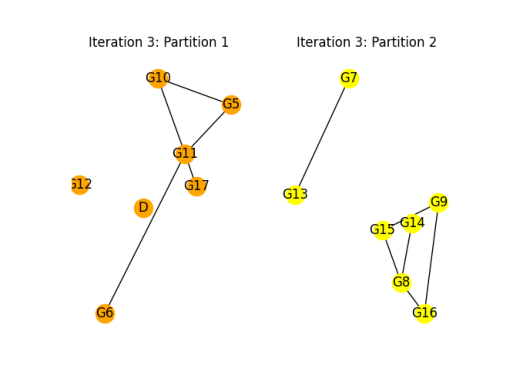

Elapsed time: 0.6975057125091553


In [66]:
import matplotlib.image as mpimg
def Kernighan_Lin(G, init_part=None, det_expl=0):  # det_expl is the flag for exploration mode
    print('Edges with weights:', edges_with_weights)
    BV = len(nodes) // 2
    if init_part is None:
        options = nodes.copy()
        random.shuffle(options)  # Random shuffle ensures random initial bipartition of nodes
        par1 = options[:BV]
        par2 = options[BV:]
        u1 = options[:BV]
        u2 = options[BV:]
    else:
        par1 = init_part[0]
        par2 = init_part[1]
        u1 = par1[:]
        u2 = par2[:]
    print('Par1:', par1)
    print('Par2:', par2)

    def Cost(i, j, edges_with_weights):  # Cost function to give edge weight cost
        for a, b, c in edges_with_weights:
            if a == i and b == j:
                return c
        return 0

    G_Sum = 0  # G_Sum will hold summation of max G values in each iteration
    G_Ceil = float('-inf')  # G_Ceil will hold the max G_Sum value in all iterations
    Distribution = []  # Distribution array will hold the best partition and G_Ceil
    no_of_cuts = 0
    min_no_of_cuts = float('inf')

    # For storing the initial and best partitions for det_expl == 0
    initial_partition = None
    best_partition = None

    for iter in range(BV):
        I_List = {}
        E_List = {}
        D_List = {}
        if det_expl == 1:
            print("Iteration", iter)
            print("Currently partitions are:")
            print('Par1:', par1)
            print('Par2:', par2)
            print('u1:', u1)
            print('u2:', u2)

        if iter >= 0:
            for i in par1:  # Both for loops fill the I, E, and D Lists
                I = 0
                E = 0
                for s, e, w in edges_with_weights:
                    if s == i:
                        if e in par1:
                            I += w
                        elif e in par2:
                            E += w
                D = E - I
                I_List[i] = I
                E_List[i] = E
                D_List[i] = D
            for i in par2:
                I = 0
                E = 0
                for s, e, w in edges_with_weights:
                    if s == i:
                        if e in par2:
                            I += w
                        elif e in par1:
                            E += w
                D = E - I
                I_List[i] = I
                E_List[i] = E
                D_List[i] = D
            if det_expl == 1:
                print('I_List', I_List)
                print('E_List', E_List)
                print('D_List', D_List)
        else:  # This else for later code revision to make optimized changes of D values
            pass

        G_List = {}
        for i in u1:
            for j in u2:
                Gval = D_List[i] + D_List[j] - (2 * Cost(i, j, edges_with_weights))  # G = Di + Dj - 2Cij
                G_List[(i, j)] = Gval
                Gval = D_List[j] + D_List[i] - (2 * Cost(j, i, edges_with_weights))
                G_List[(j, i)] = Gval

        M = max(G_List.values())  # M will store the max G value
        print('Max g value=', M)
        G_Sum += M
        print('Sum of G_max:', G_Sum)

        Check1 = float('inf')  # Check1 and Check2 are variables helping with tie-breaker scenarios
        Check2 = -1
        SWAP = list(G_List.keys())[0]
        for a, b in G_List.items():
            if b == M:
                if Cost(a[0], a[1], edges_with_weights) < Check1:
                    Check1 = Cost(a[0], a[1], edges_with_weights)
                    if det_expl == 1:
                        print('Pair to be swapped', a)
                        print('Cost=', Cost(a[0], a[1], edges_with_weights))
                    SWAP = a

        if det_expl == 1:
            print('Final Pair as follows')
            print('from par1:', SWAP[0])
            print('from par2:', SWAP[1])

        dashed_edges = []
        if SWAP[0] in u1:
            u1.remove(SWAP[0])
            u2.remove(SWAP[1])
            par1.remove(SWAP[0])
            par2.remove(SWAP[1])
            par1.append(SWAP[1])
            par2.append(SWAP[0])
        elif SWAP[0] in u2:
            u1.remove(SWAP[1])
            u2.remove(SWAP[0])
            par1.remove(SWAP[1])
            par2.remove(SWAP[0])
            par1.append(SWAP[0])
            par2.append(SWAP[1])

        PARG1 = G.subgraph(par1)
        PARG2 = G.subgraph(par2)
        for i, j in G.edges():
            if (i in par1 and j in par2) or (i in par2 and j in par1):
                dashed_edges.append((i, j))

        no_of_cuts = len(dashed_edges)
        if no_of_cuts < min_no_of_cuts:
            min_no_of_cuts = no_of_cuts
            a = par1[:]
            b = par2[:]
            Distribution = [a, b, iter, min_no_of_cuts]

        print('No of cuts in iter', iter, '=', no_of_cuts)

        # For det_expl == 0, store the initial and best partitions
        if iter == 0:
            initial_partition = [par1[:], par2[:]]  # Save the initial partition
        if no_of_cuts == min_no_of_cuts:
            best_partition = [par1[:], par2[:]]  # Save the best partition

        # Plotting the partitions based on det_expl flag
        if det_expl == 1:
            # Plot all iterations
            fig, (ax1, ax2) = plt.subplots(1, 2)
            nx.draw(PARG1, pos, with_labels=True, node_color='orange', ax=ax1)
            ax1.set_title('Iteration ' + str(iter) + ': Partition 1')
            nx.draw(PARG2, pos, with_labels=True, node_color='yellow', ax=ax2)
            ax2.set_title('Iteration ' + str(iter) + ': Partition 2')
            plt.show()
            if no_of_cuts == min_no_of_cuts:
                fig.savefig('Best_Partition.png')
                plt.close(fig)
        else:
            # Plot only the initial and best partitions
            if iter == 0 or no_of_cuts == min_no_of_cuts:
                fig, (ax1, ax2) = plt.subplots(1, 2)
                nx.draw(PARG1, pos, with_labels=True, node_color='orange', ax=ax1)
                ax1.set_title('Iteration ' + str(iter) + ': Partition 1')
                nx.draw(PARG2, pos, with_labels=True, node_color='yellow', ax=ax2)
                ax2.set_title('Iteration ' + str(iter) + ': Partition 2')
                fig.savefig('Best_Partition.png')
                plt.close(fig)

    print('Final Result:')
    print('Partition 1 :', Distribution[0])
    print('Partition 2 :', Distribution[1])
    print('KL Iteration :', Distribution[2])
    print('No of cuts :', Distribution[3])
    return Distribution


undirected_G = G.to_undirected()
start_time = time.time()
Res1 = Kernighan_Lin(undirected_G, det_expl=0)  # Set det_expl to 0 or 1 based on requirement
img = mpimg.imread('Best_Partition.png')  # Replace with your saved file path
plt.imshow(img)
plt.axis('off')  # Hide axis if you don't want to display them
plt.show()
end_time = time.time()
print('Elapsed time:', end_time - start_time)
new_part = (Res1[0], Res1[1])


Floorplanning

1. Deciding the block sizes of each gate
2. Create a grid
3. find directions of each block w.r.t each other
4. Plot them without intersection

Placement

In [67]:
def simplify_graph(graph):
  """
  Simplifies a graph by creating a new graph where keys are nodes and values are accessible nodes.

  Args:
    graph: The original graph dictionary.

  Returns:
    A simplified graph dictionary.
  """

  simplified_graph = {}
  for node, neighbors in graph.items():
    simplified_graph[node] = set()
    for neighbor, edge_data in neighbors.items():
      simplified_graph[node].add(neighbor)
  return simplified_graph

# Example usage:
simplified_graph = simplify_graph(G.adj)
print(simplified_graph)

{'G5': {'G10'}, 'G10': {'G14', 'G11'}, 'G6': {'G11'}, 'G11': {'G9', 'G5'}, 'G7': {'G13'}, 'G13': {'G12'}, 'G14': set(), 'G17': {'G11'}, 'G8': {'G6', 'G14'}, 'G15': {'G8', 'G12'}, 'G12': {'G7'}, 'G16': {'G8'}, 'G9': {'G16', 'G15'}, 'D': set()}


In [68]:
def graph_to_polish(graph, node, operator, level=0, visited=None):

    if visited is None:
        visited = set()

    if node in visited:
        return ""

    visited.add(node)

    expression = node

    # Use V for the first child, H for subsequent siblings
    first_child = True
    if operator=="V":
      operator="H"
    else:
      operator="V"
    for child in graph[node]:
        expression += f" {operator} ( {graph_to_polish(graph, child, operator, level + 1, visited)} )"
        first_child = False

    return expression

# Example usage:
graph = simplified_graph
polish_expression = graph_to_polish(graph, 'G17', "V")
print(polish_expression)

G17 H ( G11 V ( G9 H ( G16 V ( G8 H ( G6 V (  ) ) H ( G14 ) ) ) H ( G15 V (  ) V ( G12 H ( G7 V ( G13 H (  ) ) ) ) ) ) V ( G5 H ( G10 V (  ) V (  ) ) ) )


In [69]:
def remove_substrings(text, substrings_to_remove):
  for substring in substrings_to_remove:
    text = text.replace(substring, "")
  return text
polish_expression=remove_substrings(polish_expression, ['V (  )', 'H (  )', '   '])
print(polish_expression)

G17 H ( G11 V ( G9 H ( G16 V ( G8 H ( G6  ) H ( G14 ) ) ) H ( G15  V ( G12 H ( G7 V ( G13  ) ) ) ) ) V ( G5 H ( G10) ) )


In [70]:
tokens=polish_expression.split()
print(tokens)
count=0
for i in tokens:
  if i==')':
    count+=1

['G17', 'H', '(', 'G11', 'V', '(', 'G9', 'H', '(', 'G16', 'V', '(', 'G8', 'H', '(', 'G6', ')', 'H', '(', 'G14', ')', ')', ')', 'H', '(', 'G15', 'V', '(', 'G12', 'H', '(', 'G7', 'V', '(', 'G13', ')', ')', ')', ')', ')', 'V', '(', 'G5', 'H', '(', 'G10)', ')', ')']


In [71]:
def graph_to_polish_postorder(graph, node, operator, level=0, visited=None):
    """Convert a graph to a postorder Polish expression."""

    if visited is None:
        visited = set()

    if node in visited:
        return ""

    visited.add(node)

    # To accumulate the postorder expression
    expression = ""

    # We invert the operator for each level; V becomes H and H becomes V
    if operator == "V":
        operator = "H"
    else:
        operator = "V"

    # First, process the children (postorder: evaluate children first)
    for child in graph[node]:
        expression += f" ( {graph_to_polish_postorder(graph, child, operator, level + 1, visited)} ) {operator} "

    # Add the current node last (postorder: current node at the end)
    expression += node

    return expression.strip()

# Example usage:
graph = simplified_graph

# Convert the graph to a postorder Polish expression
polish_expression_postorder = graph_to_polish_postorder(graph, 'G17', "V")
polish_expression_postorder="( "+polish_expression_postorder+" ) V"
print(polish_expression_postorder)



( ( ( ( ( ( (  ) V G6 ) H  ( G14 ) H G8 ) V G16 ) H  ( (  ) V  ( ( ( (  ) H G13 ) V G7 ) H G12 ) V G15 ) H G9 ) V  ( ( (  ) V  (  ) V G10 ) H G5 ) V G11 ) H G17 ) V


In [72]:
def remove_substrings(text, substrings_to_remove):
  for substring in substrings_to_remove:
    text = text.replace(substring, "")
  return text
polish_expression_postorder=remove_substrings(polish_expression_postorder, ['(  ) H', '(  ) V'])
print(polish_expression_postorder)

tokens=polish_expression_postorder.split()
print(tokens)

( ( ( ( ( (  G6 ) H  ( G14 ) H G8 ) V G16 ) H  (   ( ( (  G13 ) V G7 ) H G12 ) V G15 ) H G9 ) V  ( (    G10 ) H G5 ) V G11 ) H G17 ) V
['(', '(', '(', '(', '(', '(', 'G6', ')', 'H', '(', 'G14', ')', 'H', 'G8', ')', 'V', 'G16', ')', 'H', '(', '(', '(', '(', 'G13', ')', 'V', 'G7', ')', 'H', 'G12', ')', 'V', 'G15', ')', 'H', 'G9', ')', 'V', '(', '(', 'G10', ')', 'H', 'G5', ')', 'V', 'G11', ')', 'H', 'G17', ')', 'V']


In [73]:
def check_parentheses_matching(tokens):
    balance = 0  # Initialize the balance counter

    for token in tokens:
        if token == '(':
            balance += 1  # Increment for opening parenthesis
        elif token == ')':
            balance -= 1  # Decrement for closing parenthesis

        # If balance is negative at any point, it means a closing parenthesis has no match
        if balance < 0:
            return False

    # If balance is not zero, it means there are unmatched opening parentheses
    return balance == 0

# Example input
#tokens = ['(', '(', '(', '(', 'G14', ')', 'V', 'G10', ')', 'H', 'G5', ')', 'V', '(', '(', '(', 'G6', ')', 'H', 'G8', ')', 'V', '(', '(', 'G13', ')', 'V', 'G7', ')', 'H', 'G12', ')', 'V', 'G15', ')', 'H', 'G16', ')', 'H', 'G9', ')', 'V', 'G11', ')', 'H', 'G17', 'V']
print(tokens)
# Check if parentheses are matched
is_matched = check_parentheses_matching(tokens)
print("Parentheses matching result:", is_matched)

['(', '(', '(', '(', '(', '(', 'G6', ')', 'H', '(', 'G14', ')', 'H', 'G8', ')', 'V', 'G16', ')', 'H', '(', '(', '(', '(', 'G13', ')', 'V', 'G7', ')', 'H', 'G12', ')', 'V', 'G15', ')', 'H', 'G9', ')', 'V', '(', '(', 'G10', ')', 'H', 'G5', ')', 'V', 'G11', ')', 'H', 'G17', ')', 'V']
Parentheses matching result: True


In [74]:
def process_floorplan_notation(notation):
    stack = []  # Stack to track operands and operators
    idx = 0

    def process_subexpression():
        nonlocal idx
        expression = ""

        while idx < len(notation):
            token = notation[idx]
            idx += 1

            if token == ')':
                return expression.strip()  # End of current sub-expression

            elif token == '(':
                # If we encounter an opening parenthesis, process the sub-expression recursively
                expression += f"({process_subexpression()})"

            elif token in nodes:
                # If token is a node, push it to the stack
                stack.append(token)
                expression += f" {token}"

            elif token in ('V', 'H'):
                # If token is an operator, handle unary or binary based on operands
                operator = token

                # For binary operations, pop two operands from the stack
                if len(stack) >= 2:
                    second_operand = stack.pop()
                    first_operand = stack.pop()
                    expression = f"({first_operand} {operator} {second_operand})"
                    # Push the result of the binary operation back to the stack
                    stack.append(expression.strip())
                elif len(stack) == 1:
                    # Unary operation (only one operand)
                    operand = stack.pop()
                    expression = f"{operand}"  # Don't apply the operator, just output the operand
                    # Push the result of the unary operation back to the stack
                    stack.append(expression.strip())

            #print(f"Current expression: {expression.strip()}")  # Debug print
            #print(f"Stack: {stack}")  # Debug print

        return expression.strip()

    # Process the whole notation
    result = process_subexpression()

    return result


# Example usage:
nodes = {'G14', 'G10', 'G5', 'G6', 'G8', 'G7', 'G13', 'G12', 'G15', 'G16', 'G9', 'G11', 'G17'}
floorplan_structure = process_floorplan_notation(tokens)

# Output the result
print("Final expression:")
print(floorplan_structure)



Final expression:
((((((((((((G6 H G14) V G8) H G16) V G13) H G7) V G12) H G15) V G9) H G10) V G5) H G11) V G17)


In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Example input
node_sizes = [
    ('G5', (5, 7)), ('G10', (2, 3)), ('G6', (5, 7)), ('G11', (2, 3)),
    ('G7', (5, 7)), ('G13', (2, 3)), ('G14', (1, 2)), ('G17', (1, 2)),
    ('G8', (2, 3)), ('G15', (3, 4)), ('G12', (2, 3)), ('G16', (3, 4)),
    ('G9', (3, 4)),
]
def remove_substrings(text, substrings_to_remove):
  for substring in substrings_to_remove:
    text = text.replace(substring, "")
  return text
floorplan_structurer=remove_substrings(floorplan_structure, ['(', ')'])
print(floorplan_structurer)
floorplan_structure=floorplan_structurer.split()
print(floorplan_structure)

# Create a dictionary for easy access to node sizes
node_size_dict = dict(node_sizes)


G6 H G14 V G8 H G16 V G13 H G7 V G12 H G15 V G9 H G10 V G5 H G11 V G17
['G6', 'H', 'G14', 'V', 'G8', 'H', 'G16', 'V', 'G13', 'H', 'G7', 'V', 'G12', 'H', 'G15', 'V', 'G9', 'H', 'G10', 'V', 'G5', 'H', 'G11', 'V', 'G17']


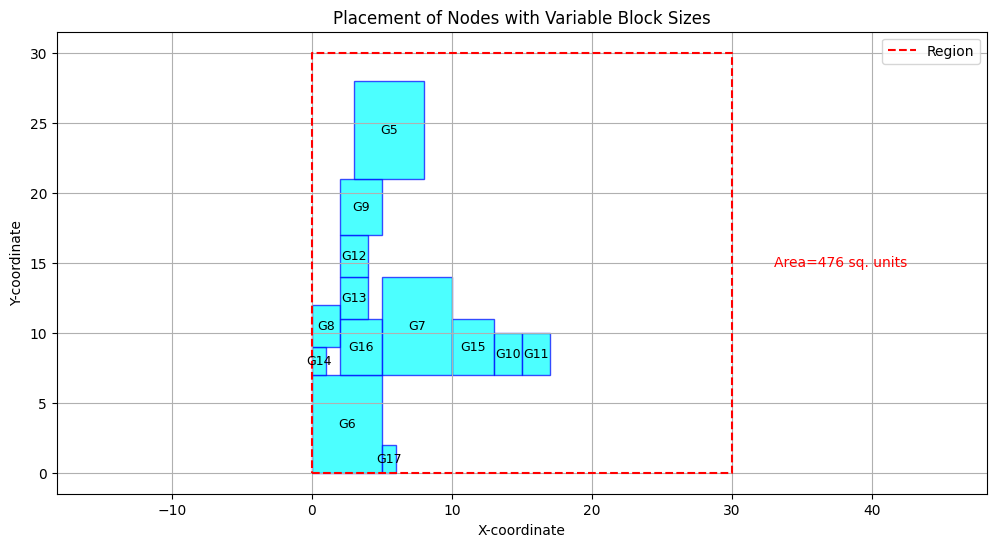

Placement Coordinates: {'G6': (0, 0, 5, 7), 'G14': (0, 7, 1, 2), 'G8': (0, 9, 2, 3), 'G16': (2, 7, 3, 4), 'G13': (2, 11, 2, 3), 'G7': (5, 7, 5, 7), 'G12': (2, 14, 2, 3), 'G15': (10, 7, 3, 4), 'G9': (2, 17, 3, 4), 'G10': (13, 7, 2, 3), 'G5': (3, 21, 5, 7), 'G11': (15, 7, 2, 3), 'G17': (5, 0, 1, 2)}
17
28


In [76]:
def placement_with_variable_blocks(nodes, node_sizes, region_bounds, floorplan_structure):
    node_size_dict = {node: size for node, size in node_sizes}
    placement_coords = {}
    y_hold = x_hold = 0
    x_min, x_max, y_min, y_max = region_bounds
    current_x, current_y = x_min, y_min
    direction = 'H'  # Start with horizontal direction

    for term in floorplan_structure:
        if term == 'H':  # Horizontal placement
            direction = 'H'
            current_y = y_hold  # Reset the vertical position based on last placed block's height
            current_x = x_min  # Reset horizontal position to x_min whenever we switch to horizontal
        elif term == 'V':  # Vertical placement
            direction = 'V'
            current_x = x_hold  # Reset the horizontal position based on last placed block's width
            current_y = y_min  # Reset vertical position to y_min whenever we switch to vertical
        elif term in nodes:  # This is a block/node (e.g., G5, G10, etc.)
            block_width, block_height = node_size_dict[term]

            # Check for overlap before placing the block
            overlap = True
            while overlap:
                overlap = False
                for placed_node, (x, y, w, h) in placement_coords.items():
                    if direction == 'H':
                        # Check if the new block overlaps with any placed block
                        if (current_x < x + w and current_x + block_width > x and
                                current_y < y + h and current_y + block_height > y):
                            overlap = True
                            current_x = x + w  # Move to the right of the placed block
                            break
                    elif direction == 'V':
                        if (current_x < x + w and current_x + block_width > x and
                                current_y < y + h and current_y + block_height > y):
                            overlap = True
                            current_y = y + h  # Move above the placed block
                            break

            # Place the block at the current position
            placement_coords[term] = (current_x, current_y, block_width, block_height)

            # Update the coordinates based on the direction
            if direction == 'V':
                current_x += block_width  # Move horizontally for the next block
                x_hold = max(x_hold, block_width)  # Track the max width in this row
            elif direction == 'H':
                current_y += block_height  # Move vertically for the next block
                y_hold = max(y_hold, block_height)  # Track the max height in this column

            # Update the region boundaries
            #x_lim = max(x_min, current_x + x_hold)  # Correct calculation of x_lim
            #y_lim = max(y_min, current_y + y_hold)  # Correct calculation of y_lim
    x_lim=0
    y_lim=0
    for ent in placement_coords:
      x_lim=max(x_lim,placement_coords[ent][0]+placement_coords[ent][2])
      y_lim=max(y_lim,placement_coords[ent][1]+placement_coords[ent][3])

    return placement_coords, x_lim, y_lim


def visualize_variable_blocks(placement_coords, region_bounds, xl, yl):
    plt.figure(figsize=(12, 6))
    x_min, x_max, y_min, y_max = region_bounds
    # Plot blocks
    for node, (x, y, w, h) in placement_coords.items():
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='blue', facecolor='cyan', alpha=0.7))
        plt.text(x + w / 2, y + h / 2, node, fontsize=9, ha='center', va='center')

    # Draw region boundaries
    plt.plot([x_min, x_max, x_max, x_min, x_min],
             [y_min, y_min, y_max, y_max, y_min], color='red', linestyle='--', label='Region')

    Area = xl * yl
    message = "Area=" + str(Area) + " sq. units"

    message_x = x_max + 0.1 * (x_max - x_min)  # Adjust offset based on desired position
    message_y = (y_min + y_max) / 2  # Center message vertically
    plt.text(message_x, message_y, message, fontsize=10, ha='left', va='center', color='red')

    # General plot settings
    plt.title("Placement of Nodes with Variable Block Sizes")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.legend()
    plt.grid()
    plt.axis('equal')  # Ensures blocks are proportionate
    plt.show()

    return Area


# Node sizes (excluding D-none)
node_sizes = [
    ('G5', (5, 7)), ('G10', (2, 3)), ('G6', (5, 7)), ('G11', (2, 3)),
    ('G7', (5, 7)), ('G13', (2, 3)), ('G14', (1, 2)), ('G17', (1, 2)),
    ('G8', (2, 3)), ('G15', (3, 4)), ('G12', (2, 3)), ('G16', (3, 4)),
    ('G9', (3, 4)),
]

# Define the region (single area)
region_bounds = (0, 30, 0, 30)

# Define the new floorplan structure
#floorplan_structure = ['G14', 'H', 'G10', 'V', 'G5', 'H', 'G6', 'V', 'G8', 'V', 'G13', 'H', 'G7', 'V', 'G12', 'H', 'G15', 'H', 'G16', 'V', 'G9', 'H', 'G11', 'V', 'G17']

# Get placement coordinates
pc, xl, yl = placement_with_variable_blocks(nodes, node_sizes, region_bounds, floorplan_structure)

# Visualize placement
visualize_variable_blocks(pc, region_bounds, xl, yl)

# Print placement coordinates
print("Placement Coordinates:", pc)
print(xl)
print(yl)

In [77]:
import numpy as np

def modify_polish_expression(expression):
    # Ensure the input is a string
    if not isinstance(expression, str):
        raise ValueError("Input expression must be a string.")

    modified_expression = list(expression.split())  # Split the input into a list of elements

    move_type = np.random.choice(['exchange_operators', 'exchange_operator_and_operand', 'exchange_operands'])

    if move_type == 'exchange_operators':
        operator_indices = [i for i, char in enumerate(modified_expression) if char in ('V', 'H')]
        if len(operator_indices) >= 2:
            optr1, optr2 = np.random.choice(operator_indices, size=2, replace=False)
            modified_expression[optr1], modified_expression[optr2] = \
                modified_expression[optr2], modified_expression[optr1]

    elif move_type == 'exchange_operator_and_operand':
        operator_indices = [i for i, char in enumerate(modified_expression) if char in ('V', 'H')]
        operand_indices = [i for i, char in enumerate(modified_expression) if char.startswith('G')]  # Assuming operands start with 'G'

        if operator_indices and operand_indices:
            optr = np.random.choice(operator_indices)
            oprd = np.random.choice(operand_indices)
            modified_expression[optr], modified_expression[oprd] = \
                modified_expression[oprd], modified_expression[optr]

    elif move_type == 'exchange_operands':
        operand_indices = [i for i, char in enumerate(modified_expression) if char.startswith('G')]  # Assuming operands start with 'G'
        if len(operand_indices) >= 2:
            oprd1, oprd2 = np.random.choice(operand_indices, size=2, replace=False)
            modified_expression[oprd1], modified_expression[oprd2] = \
                modified_expression[oprd2], modified_expression[oprd1]

    return ' '.join(modified_expression)  # Join with spaces

# Example usage
#floorplan_structure = ['G14', 'H', 'G10', 'V', 'G5', 'H', 'G6', 'V', 'G8', 'V', 'G13', 'H', 'G7', 'V', 'G12', 'H', 'G15', 'H', 'G16', 'V', 'G9', 'H', 'G11', 'V', 'G17']
# Join the floorplan structure into a single string with spaces
input_expression = ' '.join(floorplan_structure)
modified_expression = modify_polish_expression(input_expression)
print("Original Expression: ", input_expression)
print("Modified Expression: ", modified_expression)

Original Expression:  G6 H G14 V G8 H G16 V G13 H G7 V G12 H G15 V G9 H G10 V G5 H G11 V G17
Modified Expression:  G6 H G14 V G8 H G16 V G13 H G7 V G12 H G15 V G9 V G10 H G5 H G11 V G17


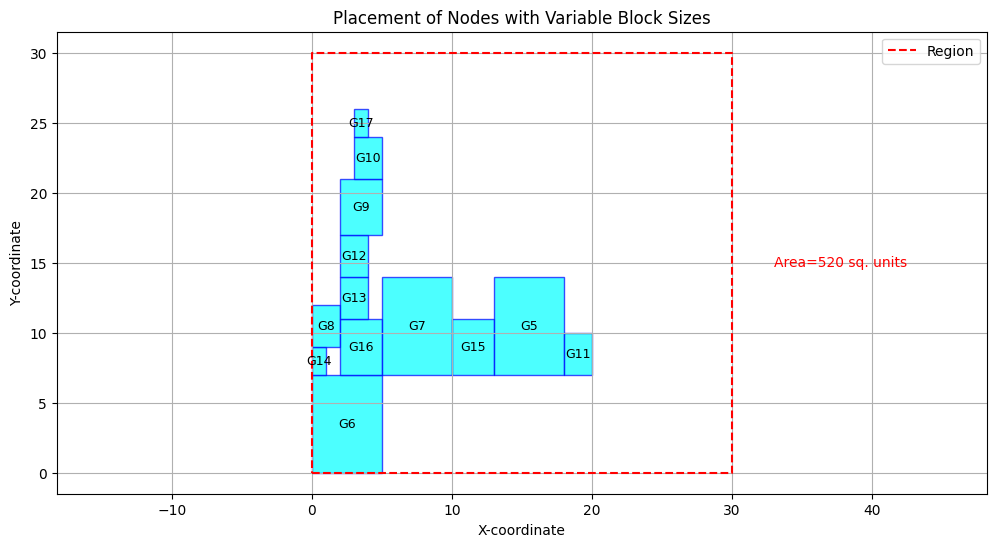

Placement Coordinates: {'G6': (0, 0, 5, 7), 'G14': (0, 7, 1, 2), 'G8': (0, 9, 2, 3), 'G16': (2, 7, 3, 4), 'G13': (2, 11, 2, 3), 'G7': (5, 7, 5, 7), 'G12': (2, 14, 2, 3), 'G15': (10, 7, 3, 4), 'G9': (2, 17, 3, 4), 'G10': (3, 21, 2, 3), 'G5': (13, 7, 5, 7), 'G11': (18, 7, 2, 3), 'G17': (3, 24, 1, 2)}


In [78]:
region_bounds = (0, 30, 0, 30)

# Define the new floorplan structure
# floorplan_structure = ['G6', 'H', 'G14', 'V', 'G8', 'H', 'G16', 'V', 'G13', 'H', 'G7', 'V', 'G12', 'H', 'G15', 'V', 'G9', 'H', 'G10', 'V', 'G5', 'H', 'G11', 'V', 'G17']

# Get placement coordinates
pc, xl, yl = placement_with_variable_blocks(nodes, node_sizes, region_bounds, modified_expression.split(' '))

# Visualize placement
visualize_variable_blocks(pc, region_bounds, xl, yl)
plt.show()
# Print placement coordinates
print("Placement Coordinates:", pc)

Iteration 0, Current Cost: 476, Best Cost: 476, T: 900.00
Iteration 5, Current Cost: 336, Best Cost: 240, T: 531.44
Iteration 10, Current Cost: 360, Best Cost: 240, T: 313.81
Iteration 15, Current Cost: 324, Best Cost: 240, T: 185.30
Iteration 20, Current Cost: 342, Best Cost: 240, T: 109.42
Iteration 25, Current Cost: 351, Best Cost: 240, T: 64.61
Iteration 30, Current Cost: 308, Best Cost: 240, T: 38.15
Iteration 35, Current Cost: 308, Best Cost: 240, T: 22.53
Iteration 40, Current Cost: 315, Best Cost: 240, T: 13.30
Iteration 45, Current Cost: 315, Best Cost: 240, T: 7.86
Iteration 50, Current Cost: 306, Best Cost: 240, T: 4.64
Iteration 55, Current Cost: 306, Best Cost: 240, T: 2.74
Iteration 60, Current Cost: 270, Best Cost: 240, T: 1.62
Iteration 65, Current Cost: 270, Best Cost: 240, T: 0.96
Iteration 70, Current Cost: 270, Best Cost: 240, T: 0.56
Iteration 75, Current Cost: 270, Best Cost: 240, T: 0.33
Iteration 80, Current Cost: 270, Best Cost: 240, T: 0.20
Iteration 85, Curre

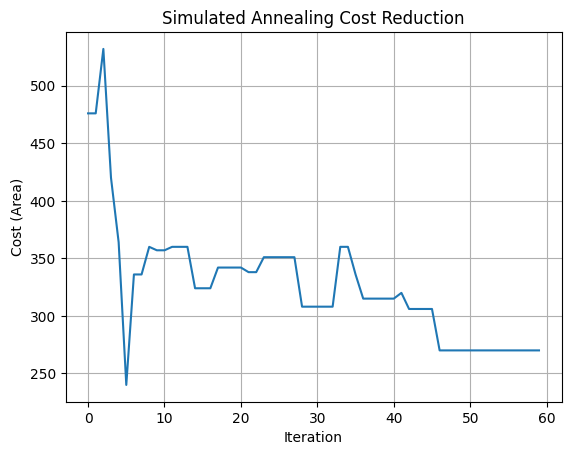

In [79]:
def simulated_annealing(nodes, node_sizes, region_bounds, initial_expression, T_init, alpha, max_iter):
    """Simulated annealing for floorplanning."""
    current_expression = initial_expression
    current_coords, xl, yl = placement_with_variable_blocks(nodes, node_sizes, region_bounds, current_expression)
    current_cost = xl*yl
    best_expression = current_expression
    best_cost = current_cost

    T = T_init
    cost_history = [current_cost]

    for iteration in range(max_iter):
        input_expression = ' '.join(current_expression)
        new_expression = modify_polish_expression(input_expression)
        new_expression=new_expression.split()
        new_coords, xl, yl = placement_with_variable_blocks(nodes, node_sizes, region_bounds, new_expression)
        new_cost = xl*yl

        delta_cost = new_cost - current_cost
        if delta_cost < 0 or random.random() < math.exp(-delta_cost / T):
            current_expression = new_expression
            current_cost = new_cost
            cost_history.append(current_cost)

            if current_cost < best_cost:
                best_expression = current_expression
                best_cost = current_cost

        T *= alpha

        if iteration % 5 == 0:
            print(f"Iteration {iteration}, Current Cost: {current_cost}, Best Cost: {best_cost}, T: {T:.2f}")

    return best_expression, best_cost, cost_history
region_bounds = (0, 100, 0, 100)
T_init = 1000  # Initial temperature
alpha = 0.9    # Cooling rate
max_iter = 100

best_expression, best_cost, cost_history = simulated_annealing(
    nodes=[node for node, _ in node_sizes],
    node_sizes=node_sizes,
    region_bounds=region_bounds,
    initial_expression=floorplan_structure,
    T_init=T_init,
    alpha=alpha,
    max_iter=max_iter
)

print("Best Expression:", best_expression)
print("Best Cost:", best_cost)

# Plot cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (Area)')
plt.title('Simulated Annealing Cost Reduction')
plt.grid()
plt.show()